In [87]:
import pandas as pd # Used for loading and handling data
import numpy as np # math functions
import seaborn as sns # visualization

from sklearn.model_selection import train_test_split # Splitting data

# Comparing to existing implementation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Task 1.1 - Implement a decision tree learning algorithm from scratch

Implement a greedy algorithm for learning decision trees:
• If all data points have the same label
– return a leaf with that label
• Else if all data points have identical feature values
– return a leaf with the most common label
• Else
– choose a feature that maximizes the information gain
– split the data based on the value of the feature and add a branch
for each subset of data
– for each branch
∗ call the algorithm recursively for the data points belonging to
the particular branch
You should use entropy as the impurity measure. Your implementation
should have two functions that the users can use: Learn and predict

The function learn learns a decision tree classifier from a data matrix X
and a label vector y. We consider the classification task so you can assume
that y consists of categorical variables. You can assume that X consists of
continuous features.
The function predict predicts the class label of some new data point x.
Note: If you implement your tree in object-oriented fashion, it is not
necessary to include the argument tree.
Note: For debugging and visualisation purposes, it may be useful to implement a function that prints the tree.



In [88]:
#learn(X, y, impurity_measure="entropy")

In [89]:
#predict(x, tree)

# Task 1.2 - Add Gini index

In [90]:
#learn(X, y, impurity_measure="gini")

# Task 1.3 - Add reduced-error pruning




Divide data to training and pruning data
1. Use the training data to build a full decision tree T
∗
(using the algorithm from Section 1.1)
2. For each subtree T of T
∗
• If replacing the subtree with the majority label in T (based on
training data) does not decrease accuracy on the pruning data
– Replace T with a leaf node that predicts the majority class

# Task 1.4 - Evaluate your algorithm

Load the MAGIC Gamma Telescope dataset from MittUiB; alternatively,
you can use https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+
Telescope. The task is to predict whether an image of a particle shower
represents a hadron or background. The first 10 columns of the data are
continuous features extracted from images of the particle showers. The 11th
column is the class label (g: gamma (signal), h: hadron (background)).
Assess the performance of your algorithm using an appropriate performance measure. Which setting should you select for this data (entropy or
gini, pruning or no pruning)? What is your estimate for the performance of
the selected model on unseen data points? Report how you arrived at the
conclusions.
Remember to use training, validation, and test sets properly. Note that
in the model selection step you select one out of the four models (settings)
based on performance on validation data and in the model evaluation step
you evaluate the selected model on test data.

In [91]:
# Reading data
data = pd.read_csv("magic04.data", header=None)
data.columns = ["X"+str(i) for i in range(0,10)] + ["Y"]
data.head()

X0        X1      X2      X3      X4        X5       X6       X7  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110  -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   

        X8        X9  Y  
0  40.0920   81.8828  g  
1   6.3609  205.2610  g  
2  76.9600  256.7880  g  
3  10.4490  116.7370  g  
4   4.6480  356.4620  g

In [92]:
# Spliting
X = data.drop(["Y"], axis = 1)
Y = data["Y"]

X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5, random_state=42)

# Task 1.5 - Compare to an existing implementation

Compare your implementation to some existing decision tree implementation.
How does your implementation fare against this implementation in terms of
accuracy and speed? Can you explain the (possible) differences?
Note: You can compare to, for example, DecisionTreeClassifier from
sklearn

In [93]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_param, cv=5, verbose=1)
clf.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

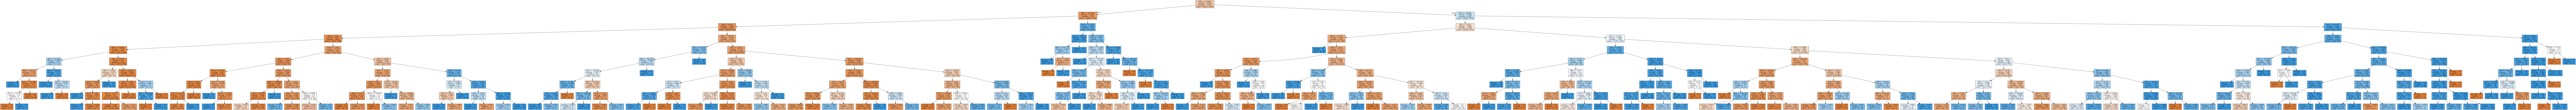

In [94]:
print("Best params: " + str(clf.best_params_))

Y_test_pred = clf.predict(X_test)

print("Test accuracy: {:3.2f}%".format(accuracy_score(Y_test, Y_test_pred)*100))

Best params: {'criterion': 'entropy', 'max_depth': 9}
Test accuracy: 85.63%


In [95]:
from sklearn.tree import export_graphviz
export_graphviz( 
 clf.best_estimator_,
 out_file=("tree.dot"),
 feature_names=None,
 class_names=None,
 filled=True,
)